# Varshini Balaji
# BL.EN.U4AIE21139



# LAB-5

A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it. Use numpy.fft.ifft() to inverse transform the frequency spectrum to time domain signal.

Original Audio:


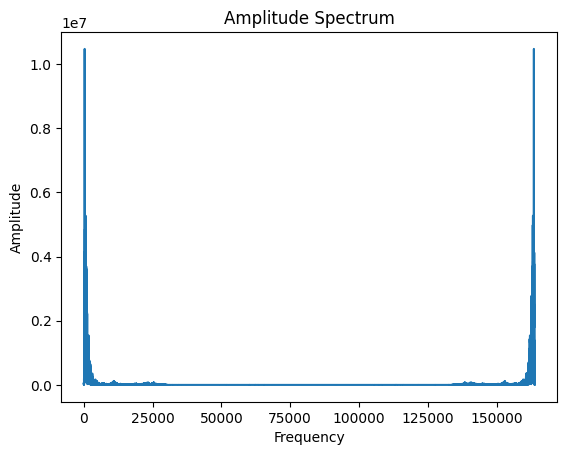

Spectral Transformation Complete.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import soundfile as sf  # Install using 'pip install soundfile'
import IPython.display as ipd  # Install using 'pip install ipython'

# Load the recorded speech signal
audio_file = r"AI in speech processing.wav"
rate, data = wavfile.read(audio_file)

# Take only one channel (assuming it's a stereo audio file)
data = data[:, 0]

# Display the original audio
print("Original Audio:")
ipd.display(ipd.Audio(data, rate=rate))

# A1. Spectral Transformation:
# Perform FFT to transform to the spectral domain
spectrum = np.fft.fft(data)

# Plot the amplitude part of the spectral components
plt.plot(np.abs(spectrum))
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

print("Spectral Transformation Complete.")

# Inverse transform to time domain signal
time_domain_signal = np.fft.ifft(spectrum).real



A2. Use a rectangular window to select the low frequency components from your spectrum. Inverse transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high pass frequencies of spectrum.

Low-pass Filtered Audio:


Band-pass Filtered Audio:


High-pass Filtered Audio:


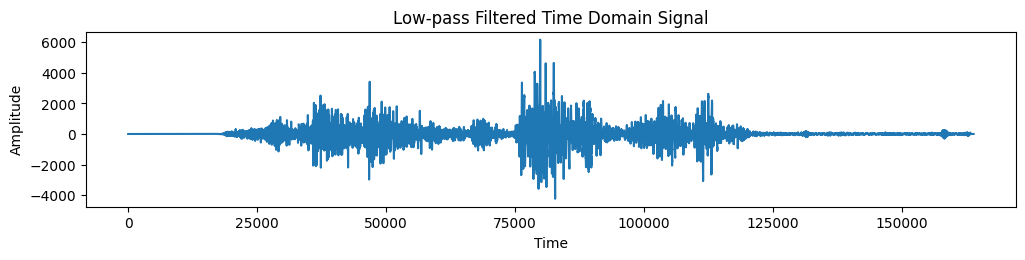

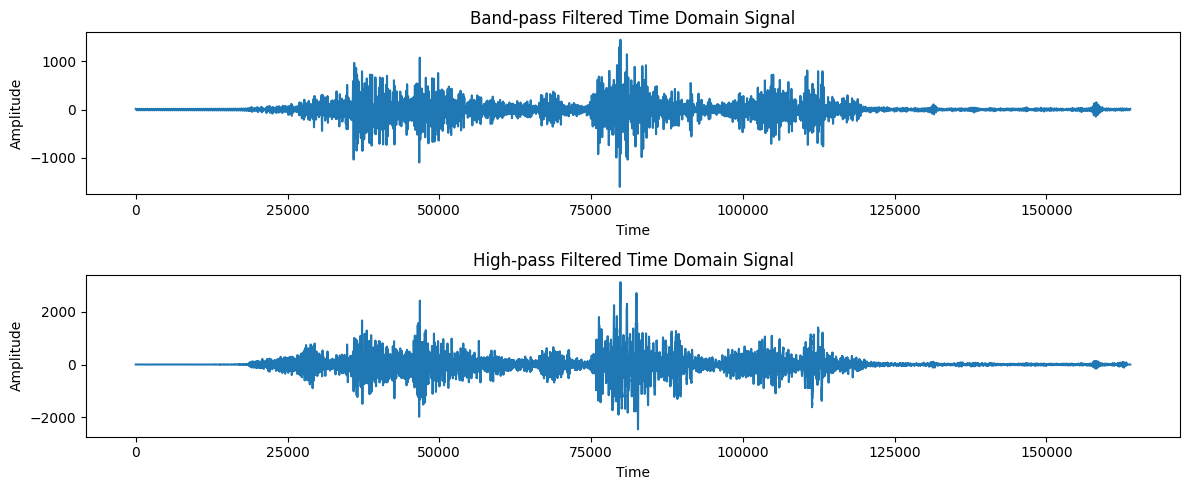

In [ ]:
 #A2. Filtering with Rectangular Window (Low Pass):
# Define the rectangular window
rectangular_window = np.ones_like(spectrum)

# Apply the window to the spectrum
filtered_spectrum_lowpass = spectrum * rectangular_window

# Inverse transform the filtered spectrum
filtered_signal_lowpass = np.fft.ifft(filtered_spectrum_lowpass).real

# Save the low-pass filtered audio to a WAV file
sf.write('lowpass_filtered.wav', filtered_signal_lowpass, rate)

# Output: Low-pass Filtered Audio and Graph
print("Low-pass Filtered Audio:")
ipd.display(ipd.Audio(filtered_signal_lowpass, rate=rate))

plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(filtered_signal_lowpass)
plt.title('Low-pass Filtered Time Domain Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')



# A2. Band Pass and High Pass Filtering (Rectangular Window):
# Define band-pass and high-pass rectangular windows
band_pass_window = np.zeros_like(spectrum)
band_pass_window[500:1500] = 1  # Adjust frequency range as needed

high_pass_window = np.zeros_like(spectrum)
high_pass_window[1500:] = 1  # Adjust frequency range as needed

# Apply band-pass and high-pass windows to the spectrum
filtered_spectrum_band_pass = spectrum * band_pass_window
filtered_spectrum_high_pass = spectrum * high_pass_window

# Inverse transform the filtered spectra
filtered_signal_band_pass = np.fft.ifft(filtered_spectrum_band_pass).real
filtered_signal_high_pass = np.fft.ifft(filtered_spectrum_high_pass).real

# Save the band-pass and high-pass filtered audio to WAV files
sf.write('band_pass_filtered.wav', filtered_signal_band_pass, rate)
sf.write('high_pass_filtered.wav', filtered_signal_high_pass, rate)

# Output: Band-pass and High-pass Filtered Audio and Graphs
print("Band-pass Filtered Audio:")
ipd.display(ipd.Audio(filtered_signal_band_pass, rate=rate))

print("High-pass Filtered Audio:")
ipd.display(ipd.Audio(filtered_signal_high_pass, rate=rate))

plt.figure(figsize=(12, 5))

plt.subplot(2, 1, 1)
plt.plot(filtered_signal_band_pass)
plt.title('Band-pass Filtered Time Domain Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal_high_pass)
plt.title('High-pass Filtered Time Domain Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()  # Add space between graphs and heading
plt.show()


A2. Repeat A2 with other filter types such as Cosine / Gausian filters.

Play Cosine-Filtered Audio:


Play Gaussian-Filtered Audio:


Cosine and Gaussian Filtering Complete.
Output saved to 'cosine_filtered.wav' and 'gaussian_filtered.wav'.


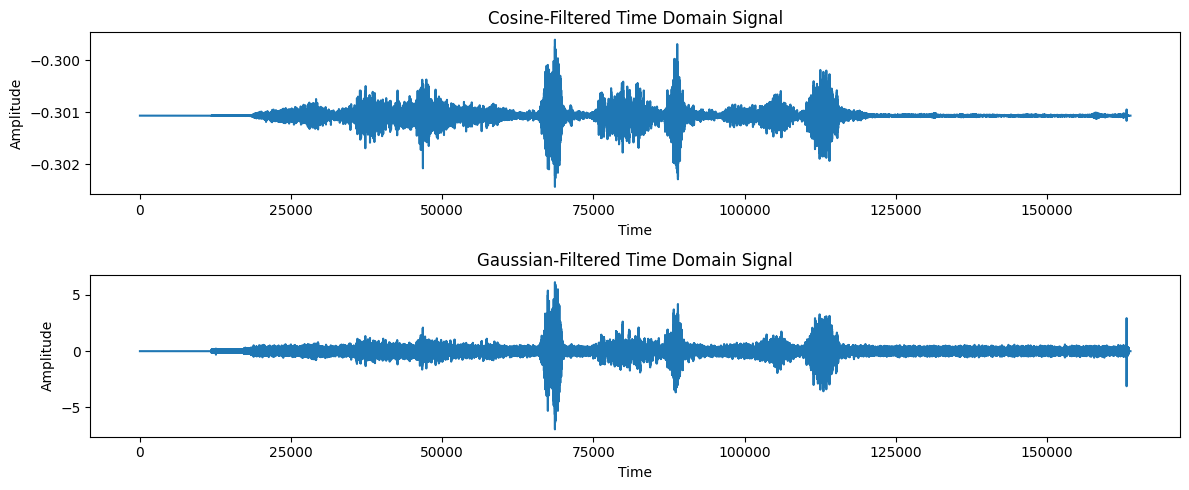

In [ ]:



# A3. Filtering with Other Window Types (Cosine and Gaussian):
# Define the cosine window with the same length as the spectrum
cosine_window = np.cos(np.linspace(0, np.pi, len(spectrum)))

# Define the Gaussian window with adjustable parameters (mean and standard deviation)
gaussian_mean = len(spectrum) // 2
gaussian_std = len(spectrum) // 8
gaussian_window = np.exp(-(np.arange(len(spectrum)) - gaussian_mean)**2 / (2 * gaussian_std**2))

# Apply the windows to the spectrum
filtered_spectrum_cosine = spectrum * cosine_window
filtered_spectrum_gaussian = spectrum * gaussian_window

# Inverse transform the filtered spectra
filtered_signal_cosine = np.fft.ifft(filtered_spectrum_cosine).real
filtered_signal_gaussian = np.fft.ifft(filtered_spectrum_gaussian).real

# Save the cosine and Gaussian filtered audio to WAV files
sf.write('cosine_filtered.wav', filtered_signal_cosine, rate)
sf.write('gaussian_filtered.wav', filtered_signal_gaussian, rate)
 #Play the cosine-filtered audio
print("Play Cosine-Filtered Audio:")
ipd.display(ipd.Audio(filtered_signal_cosine, rate=rate))

# Play the Gaussian-filtered audio
print("Play Gaussian-Filtered Audio:")
ipd.display(ipd.Audio(filtered_signal_gaussian, rate=rate))


print("Cosine and Gaussian Filtering Complete.")
print("Output saved to 'cosine_filtered.wav' and 'gaussian_filtered.wav'.")

# Display the cosine and Gaussian filtered time-domain signals
plt.figure(figsize=(12, 5))

plt.subplot(2, 1, 1)
plt.plot(filtered_signal_cosine)
plt.title('Cosine-Filtered Time Domain Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal_gaussian)
plt.title('Gaussian-Filtered Time Domain Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

